# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
# Your Code Here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [5]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [6]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [15]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

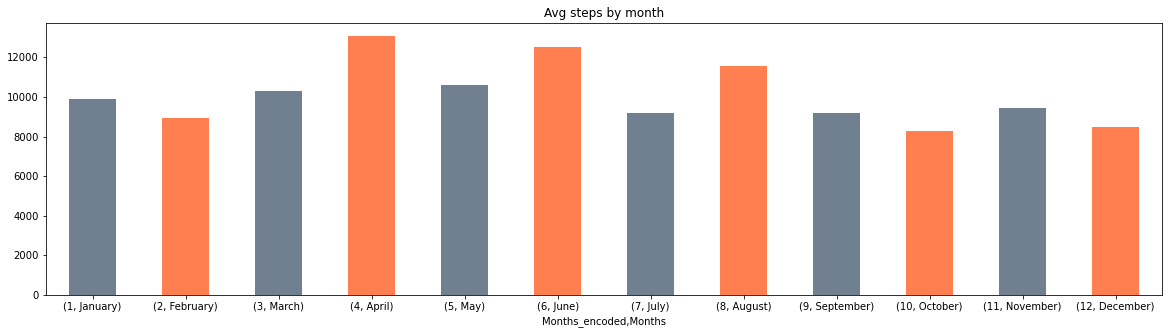

In [11]:
# AVERAGE STEPS BY MONTH_ENCODED
# Months_encoded: número del mes.
a = fitbit.groupby(["Months_encoded","Months"])["Steps"].mean().plot(figsize=(20,5) ,kind="bar", color=["slategray","coral"], title="Avg steps by month");
plt.xticks(rotation=0);
a.figure.savefig("/mnt/c/Users/Krujo/a.png", dpi=300)


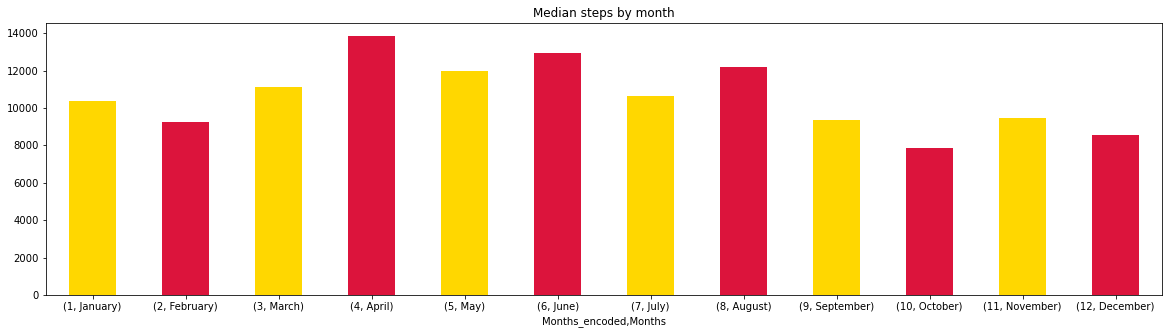

In [12]:
#Shows the median steps by month.
b = fitbit.groupby(["Months_encoded","Months"])["Steps"].median().plot(figsize=(20,5) ,kind="bar", color=["gold","crimson"],title="Median steps by month");
plt.xticks(rotation=0);
b.figure.savefig("/mnt/c/Users/Krujo/b.png", dpi=300)

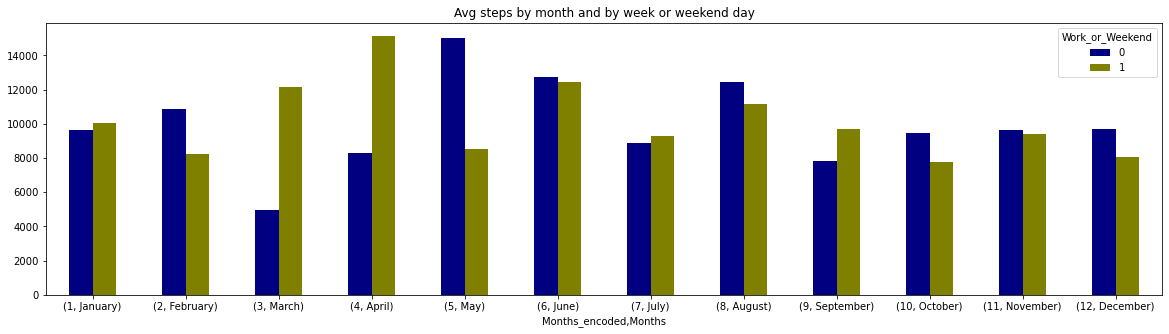

In [13]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# Work_or_Weekend: 0 (weekend)/1 (work) dependiendo de si es finde o entre semana.
c = fitbit.groupby(["Months_encoded","Months","Work_or_Weekend"])["Steps"].mean().unstack().plot(figsize=(20,5) ,kind="bar", color=["navy","olive"], title="Avg steps by month and by week or weekend day", );
plt.xticks(rotation=0);
c.figure.savefig("/mnt/c/Users/Krujo/a.png", dpi=300)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

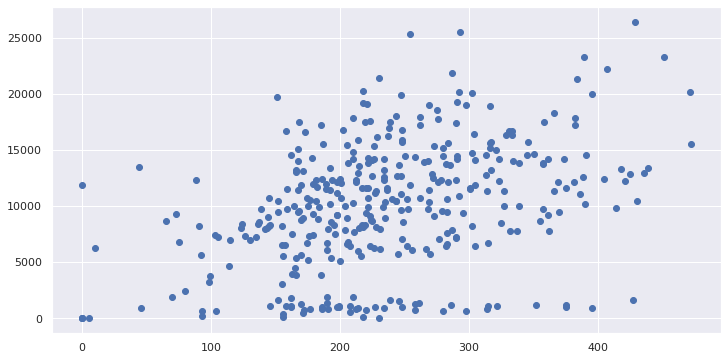

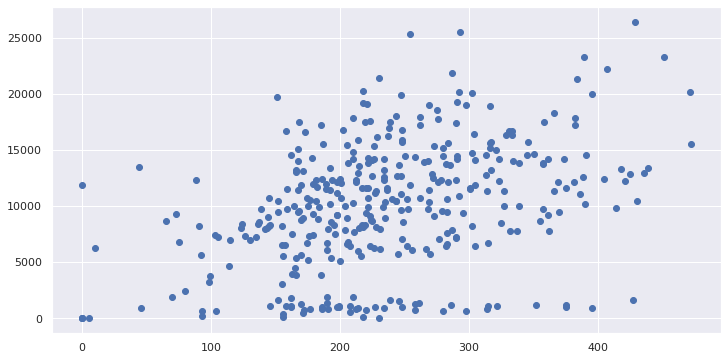

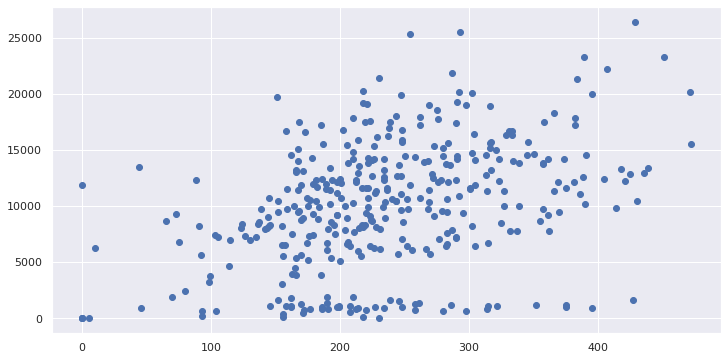

In [299]:
x = fitbit['Minutes Lightly Active']

for i in range(3):
    plt.figure()
    plt.scatter(x=x, y=fitbit.Steps);
    # Show/save figure as desired.
    plt.show()

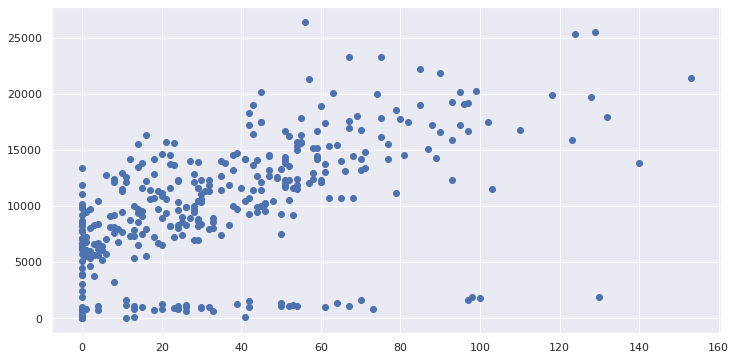

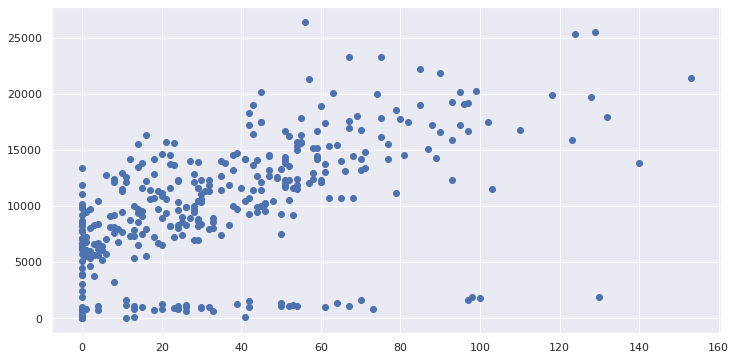

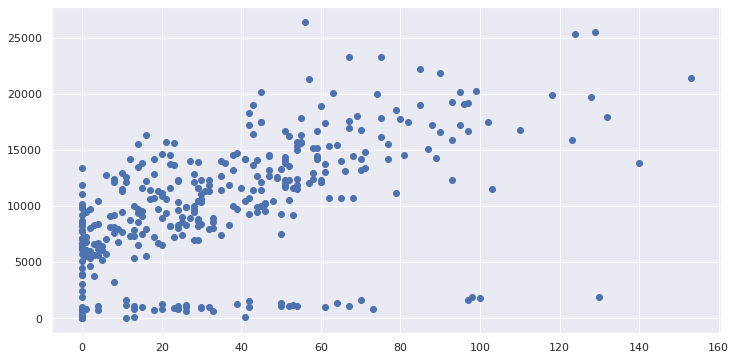

In [300]:
x = fitbit['Minutes Very Active']

for i in range(3):
    plt.figure()
    plt.scatter(x=x, y=fitbit.Steps);
    # Show/save figure as desired.
    plt.show()

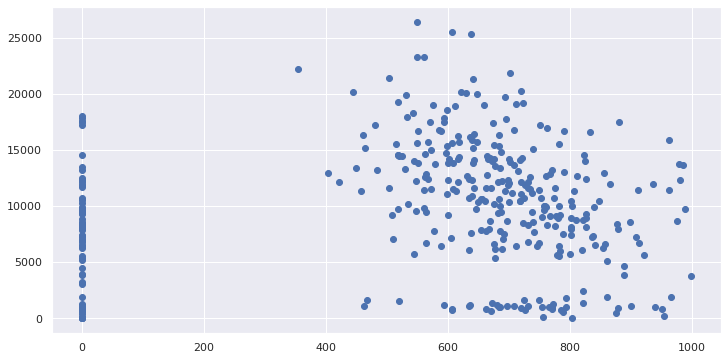

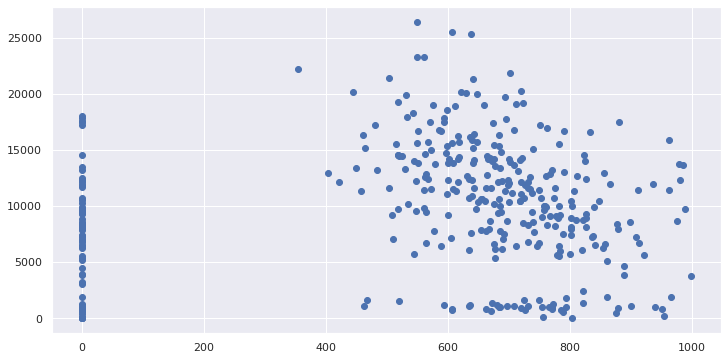

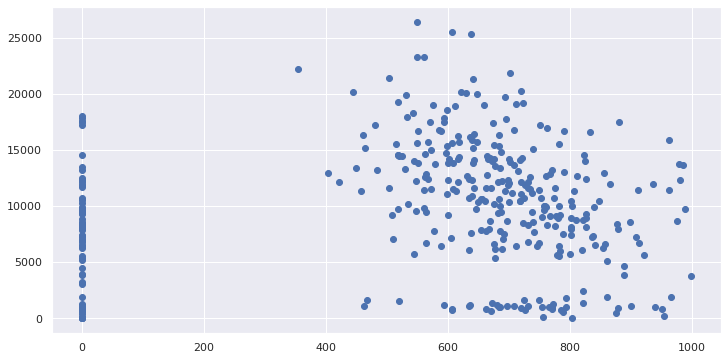

In [301]:
x = fitbit['Minutes Sedentary']

for i in range(3):
    plt.figure()
    plt.scatter(x=x, y=fitbit.Steps);
    # Show/save figure as desired.
    plt.show()


    

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [102]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Explore the titanic dataset using Pandas dtypes.

In [113]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [110]:
# NUMERICAL VARIABLES
# DataFrame.select_dtypes(include=None, exclude=None)
titanic.select_dtypes(exclude=object).sample(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
821,822,1.0,3,27.0,0,0,8.6625
366,367,1.0,1,60.0,1,0,75.2500
954,955,NaN,3,22.0,0,0,7.7250


In [115]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=object).sample(3)

,Name,Gender,Ticket,Cabin,Embarked
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,350406,U0,S
738,"Ivanoff, Mr. Kanio",male,349201,U0,S
1011,"Watt, Miss. Bertha J",female,C.A. 33595,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [116]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (12.,6.)})

#### Use the right visulalization to show the distribution of column `Age`.

In [132]:
colors = {'male':'tab:blue', 'female':'tab:orange'}

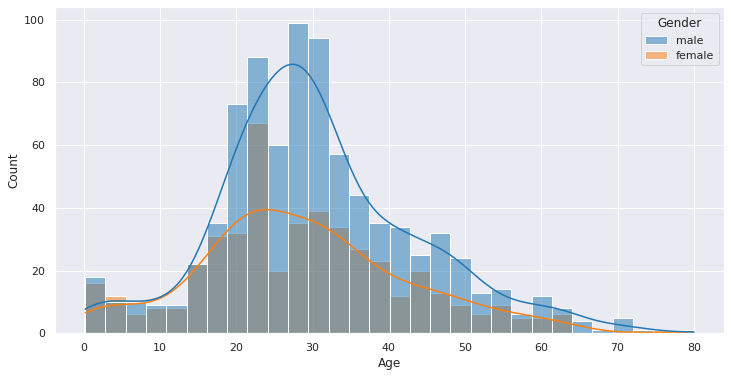

In [139]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, kde=True);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

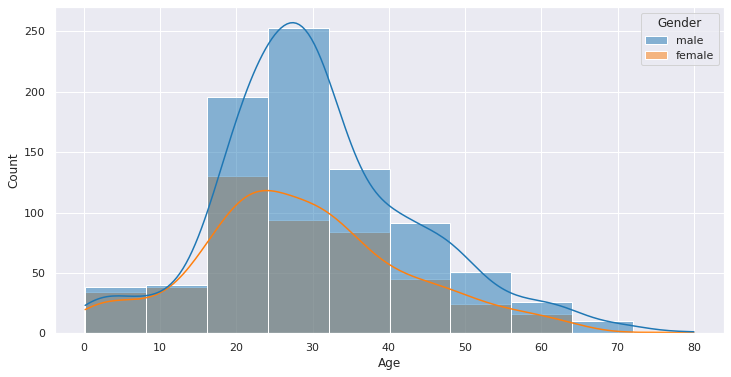

In [152]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, bins=10, kde=True);

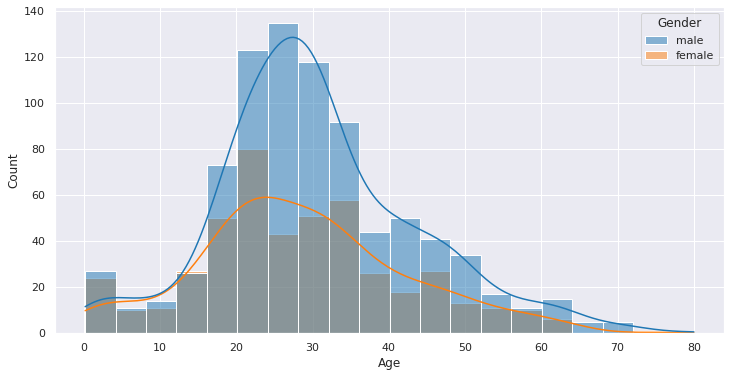

In [151]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, bins=20, kde=True);

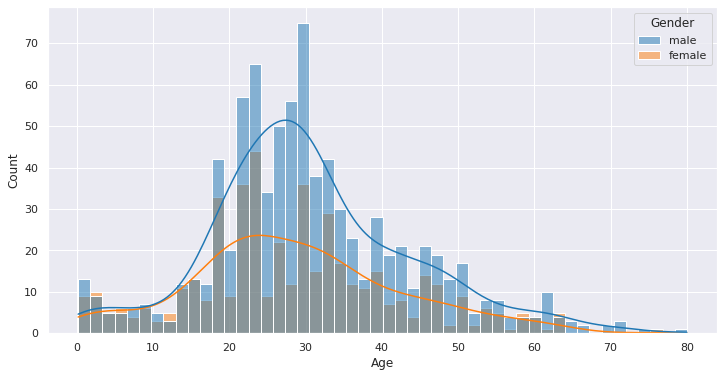

In [153]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, bins=50, kde=True);

#### How does the bin size affect your plot?

In [ ]:
"""
It affects the binswidth, so for example from 20 to 30 years with bins=10 it's not possible to appreciate that around the 25
years there is a big drop in the serie.
"""

#### Use seaborn to show the distribution of column `Age`.

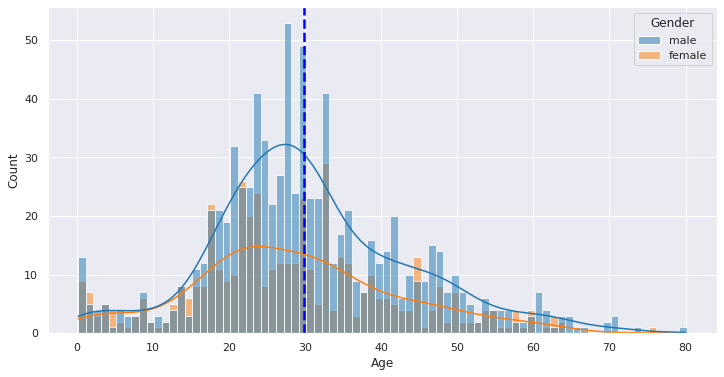

In [165]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, binwidth=(1), kde=True);
plt.axvline(x=titanic.Age.mean(),
            color='blue',
            ls='--', 
            lw=2.5);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(-1.1087172584473963,
 1.115396545532452,
 -1.1129882387529657,
 1.100618487559665)

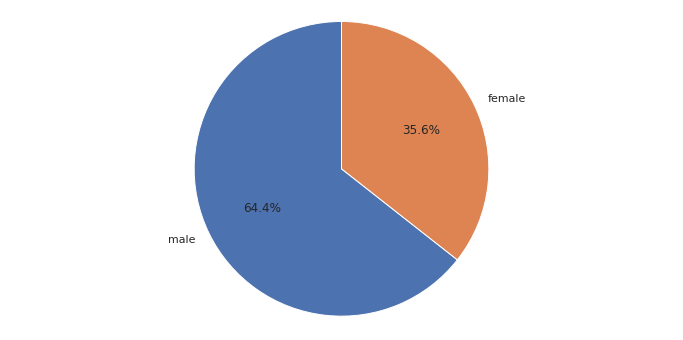

In [208]:
# Method 1 - matplotlib
labels = 'male', 'female'
sizes = titanic["Gender"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')

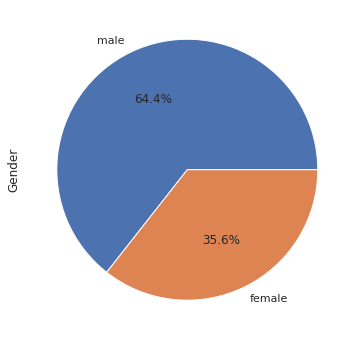

In [201]:
# Method 2 - seaborn
pie_test = titanic["Gender"].value_counts()
pie_test.plot.pie(autopct="%.1f%%");

# Use the right plot to visualize the column `Pclass`.

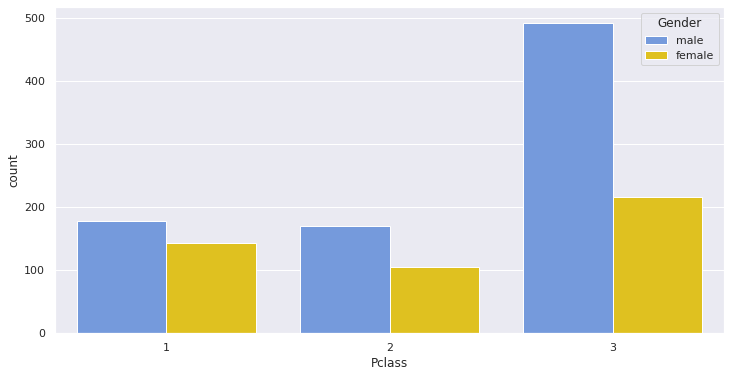

In [191]:
# I've added the gender for making it more useful.
sns.countplot(x=titanic.Pclass, hue=titanic.Gender, palette=("cornflowerblue","gold"));

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# I prefer to do it at the same time. Besides, if the first part was only expecting a graph with the summary statistics values
# I don't know how it could be done without creating a full serie.

In [222]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

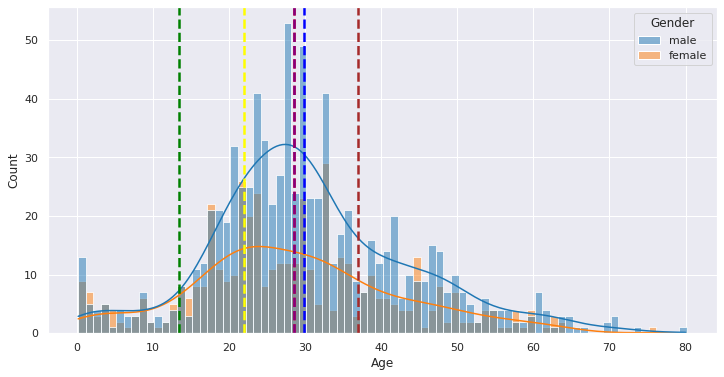

In [267]:
sns.histplot(data=titanic, x="Age", hue="Gender", element='bars', palette=colors, binwidth=(1), kde=True);
plt.axvline(x=titanic.Age.mean(),
            color='blue',
            ls='--', 
            lw=2.5,
            label="mean");
plt.axvline(x=titanic.Age.median(),
            color='red',
            ls='--', 
            lw=2.5,
            label="median");
plt.axvline(x=titanic.Age.std(),
            color='green',
            ls='--', 
            lw=2.5,
            label="standard deviation");
plt.axvline(x=titanic.Age.dropna().quantile(.25),
            color='yellow',
            ls='--', 
            lw=2.5,
            label="quantile 0.25");
plt.axvline(x=titanic.Age.dropna().quantile(.50),
            color='purple',
            ls='--', 
            lw=2.5,
            label="quantile 0.50");
plt.axvline(x=titanic.Age.dropna().quantile(.75),
            color='brown',
            ls='--', 
            lw=2.5,
            label="quantile 0.75");

In [ ]:
"""
The quantiles could be estimated with .quantile([0.25,0.75]), but it gives problems when I try to apply everything together
in the graph.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
That the mean is around 30 years, the median around 28, and the max is 80 years. Besides most of the values are between the 20s
and the 40s years.
"""

#### What additional information does the last plot provide about feature `Age`?

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

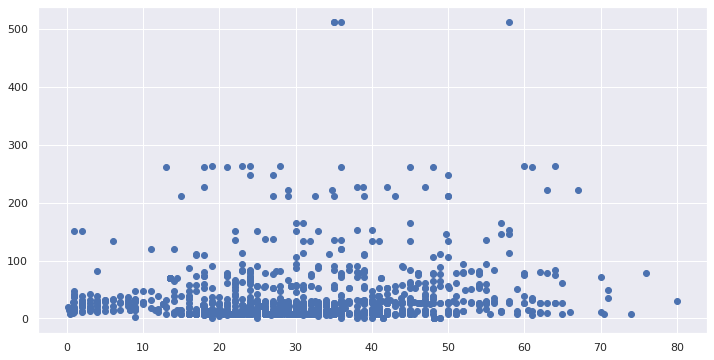

In [270]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare);

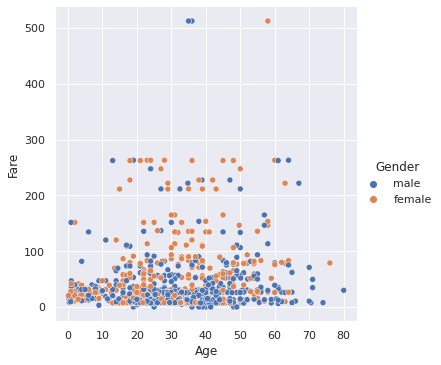

In [238]:
# Method 2 - seaborn
sns.relplot(x="Age", y="Fare", hue="Gender", data=titanic);

In [ ]:
# There is not a strong correlation between age and fare.

#### Plot the correlation matrix using seaborn.

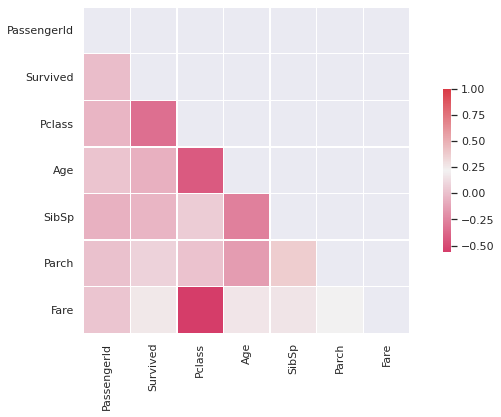

In [234]:
corr = titanic.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True,
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5});


#### What are the most correlated features?

In [ ]:
"""
(1) Pclass and Fare, (2) Pclass and Age, (3) Pclass and Survived.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

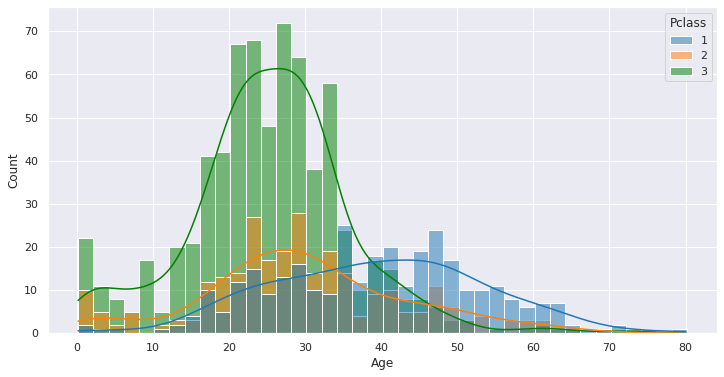

In [283]:
colors = {1:'tab:blue', 2:'tab:orange', 3:'green'}
sns.histplot(data=titanic, x="Age", hue="Pclass", element='bars', palette=colors, binwidth=(2), kde=True);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [304]:
# With the histogram is possible to see it.